In [ ]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("sample_cropped.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="train")


In [102]:
label_dict = {
    ' ': 0,
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    'e': 5,
    'f': 6,
    'g': 7,
    'h': 8,
    'i': 9,
    'j': 10,
    'k': 11,
    'l': 12,
    'm': 13,
    'n': 14,
    'o': 15,
    'p': 16,
    'q': 17,
    'r': 18,
    's': 19,
    't': 20,
    'u': 21,
    'v': 22,
    'w': 23,
    'x': 24,
    'y': 25,
    'z': 26
}

In [103]:
label_dict['a']

1

In [112]:
import os
words = [f.split('.')[0].lower() for f in os.listdir('train')]
label_chars = []
for w in words:
  label_chars.extend(list(w))

label_dict = {i+1: item for i, item in enumerate(list(set(label_chars)))}
label_dict[0] = ' '
label_dict

{1: 'j',
 2: '5',
 3: 'm',
 4: '8',
 5: 'p',
 6: 'y',
 7: 'd',
 8: '(',
 9: 'c',
 10: '2',
 11: 'u',
 12: '3',
 13: 'i',
 14: '-',
 15: 'g',
 16: 'b',
 17: 's',
 18: 'o',
 19: 'e',
 20: 'w',
 21: 'h',
 22: 'l',
 23: '0',
 24: '6',
 25: "'",
 26: '"',
 27: ')',
 28: 'v',
 29: 'r',
 30: '!',
 31: 'k',
 32: 't',
 33: 'x',
 34: '7',
 35: ':',
 36: 'n',
 37: '1',
 38: 'f',
 39: 'a',
 40: '4',
 41: 'q',
 0: ' '}

In [118]:
label_to_list = {v: k for k, v in label_dict.items()}
[label_to_list[i] for i in 'hello']

[21, 19, 22, 22, 18]

In [ ]:
hello = 'hello'
[for i in hello]

In [119]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import torchvision.transforms as T
from torchvision.io import read_image
import matplotlib.pyplot as plt
from PIL import Image

class CustomImageDataset(Dataset):
  def __init__(self, img_dir, transform=None, target_transform=None):
    #.DS_Store error later with UnidentifiedImageError
    self.img_labels = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png','.jpg','jpeg')) and not f.startswith('.')]
    self.img_dir = img_dir
    # "During training, all images are scaled to 100 x 32 in order to accelerate the training process."
    self.transform = T.Compose([
        T.Resize((32,100)),
        # Input: W x 32 gray-scale image
        T.Grayscale(),
        T.ToTensor()
    ])
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels[idx])


    image = Image.open(img_path)

    label = self.img_labels[idx].split('.')[0].replace('{slash}','/').lower()
    label_list = [label_to_list[i] for i in label]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label_list, label

In [120]:
customdata = CustomImageDataset("train")

In [121]:
len(customdata)

162

In [122]:
type(customdata.__getitem__(1)[0])

torch.Tensor

In [123]:
customdata.__getitem__(1)[0].size()

torch.Size([1, 32, 100])

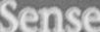

In [100]:
sample_img = customdata.__getitem__(20)[0]
tr = T.ToPILImage()
img = tr(sample_img)
img # not img.show()

In [124]:
customdata.__getitem__(20)[1]

[17, 19, 36, 17, 19]

In [127]:
customdata.__getitem__(20)[2]

'sense'

https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets


In [134]:
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 8
validation_split = .2
shuffle_dataset = True
random_seed = 42

dataset_size = len(customdata)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
  np.random.seed(random_seed)
  np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [135]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(customdata, batch_size=batch_size, sampler=train_sampler)
test_dataloader = DataLoader(customdata, batch_size=batch_size, sampler=valid_sampler)

In [136]:
for d, l, _ in train_dataloader:
  print(d.size()) # (N, C, H, W)
  print(l)
  break

# might need a custom collate function

RuntimeError: each element in list of batch should be of equal size

In [ ]:
def collate_fn(batch):
  images, labels, label_lengths = zip(*batch)
  labels_padded = pad_sequence(la)

In [ ]:
for d, l, _ in train_dataloader:
  print(d.size()) # (N, C, H, W)
  print(l)
  break

sample_img.shape: torch.Size([1, 32, 100])
sample_img_transposed.shape: (32, 100, 1)
conv2d'd sample_img.shape: torch.Size([3, 33, 101])
(33, 101, 3)


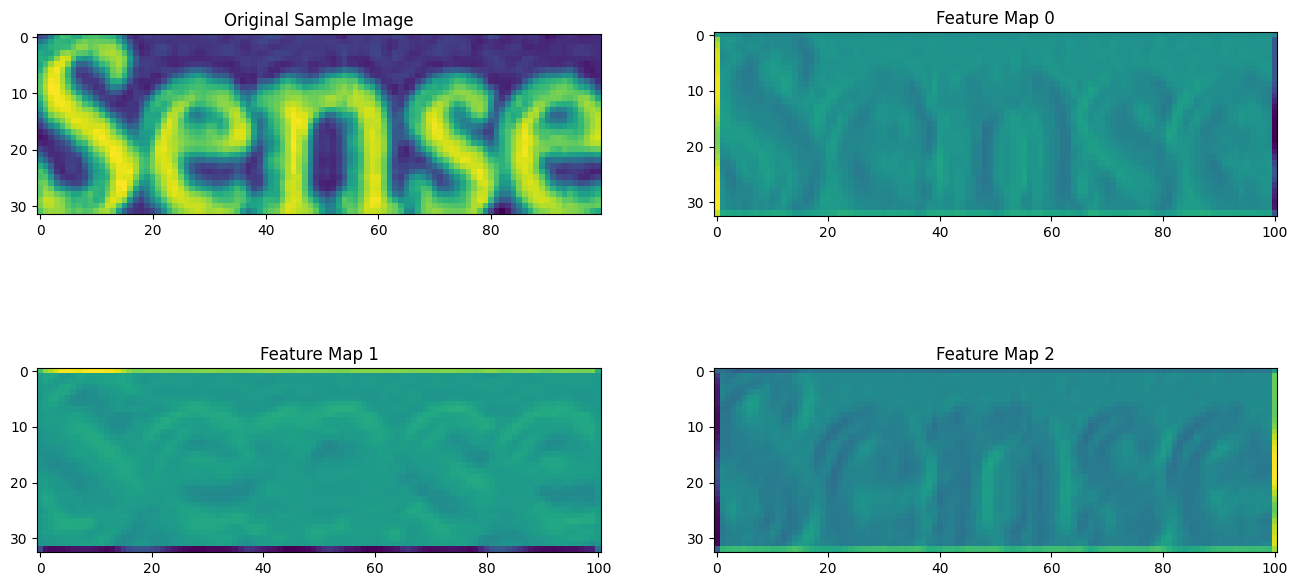

In [68]:
sample_img_transposed = np.asarray(sample_img).transpose(1,2,0)
print(f'sample_img.shape: {sample_img.shape}')
print(f'sample_img_transposed.shape: {sample_img_transposed.shape}')

conv2 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(2,2), stride=1, padding=1)
print(f'conv2d\'d sample_img.shape: {conv2(sample_img).shape}')
img = conv2(sample_img).permute(1,2,0)
result = img.data.numpy()
print(result.shape) # (33, 101, 3)

max_ = np.max(result)
min_ = np.min(result)
result -= min_
result /= max_

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(sample_img_transposed)
plt.title('Original Sample Image')
for i in range(3):
  plt.subplot(2,2,i+2)
  plt.imshow(result[:,:,i])
  plt.title(f'Feature Map {i}')

plt.show()

The paper's configuration seems to omit the activation layer part from its model configuration figure, [the cited VGG paper](https://arxiv.org/pdf/1409.1556.pdf) said "the relu activation function is not shown for brevity", but as it's typically known to put the activation after each convolutional layer and before pooling layers, so I'd do the same thing.

https://stackoverflow.com/questions/35543428/activation-function-after-pooling-layer-or-convolutional-layer


Seems like the order doesn't matter between pooling and activation

In [69]:
from torch import nn
import torch.nn.functional as F

class VGG(nn.Module):
  def __init__(self):
    super().__init__()
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
    # output is (C, H, W)
    self.conv1 = nn.Conv2d(1, 64, (3,3),1,1)
    self.maxpool1 = nn.MaxPool2d((2,2),2)
    self.conv2 = nn.Conv2d(64, 128, (3,3), 1, 1)
    self.maxpool2 = nn.MaxPool2d((2,2), 2)
    self.conv3 = nn.Conv2d(128, 256, (3,3), 1, 1)
    self.conv4 = nn.Conv2d(256, 256, (3,3), 1, 1)
    self.maxpool3 = nn.MaxPool2d((1,2), 2)
    self.conv5 = nn.Conv2d(256, 512, (3,3), 1, 1)
    self.bn1 = nn.BatchNorm2d(512)
    self.conv6 = nn.Conv2d(512, 512, (3,3), 1, 1)
    self.bn2 = nn.BatchNorm2d(512)
    # the rectangular pooling windows instead of the conventional squared ones yield feature maps with larger width, hence longer feature sequence
    self.maxpool4 = nn.MaxPool2d((1,2), 2)
    self.conv7 = nn.Conv2d(512, 512, (2, 2), 1, 0)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.maxpool1(x)
    x = F.relu(self.conv2(x))
    x = self.maxpool2(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.maxpool3(x)
    x = F.relu(self.conv5(x))
    x = self.bn1(x)
    x = F.relu(self.conv6(x))
    x = self.bn2(x)
    x = self.maxpool4(x)
    x = F.relu(self.conv7(x))
    return x

In [70]:
vgg = VGG()

In [79]:
img_t = customdata.__getitem__(20)[0]

In [83]:
img_t_unsqueezed = img_t.unsqueeze(0)
img_t_unsqueezed.shape

torch.Size([1, 1, 32, 100])

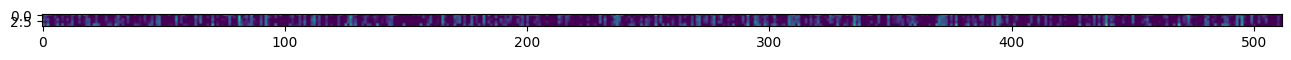

In [93]:
result = vgg(img_t_unsqueezed).permute(0,2,3,1).data.numpy()

plt.figure(figsize=(16,8))
plt.imshow(result[0].transpose(1,2,0))

plt.show()

In [94]:
vgg(img_t_unsqueezed).shape # [batch_size, channels, height, width]

torch.Size([1, 512, 1, 5])

In [128]:
len(label_to_list)

42

In [129]:
class CRNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.vgg = VGG()
    self.blstm1 = nn.LSTM(512, 256, bidirectional=True)
    self.blstm2 = nn.LSTM(512, 256, bidirectional=True)
    self.fc = nn.Linear(512, len(label_to_list))

  def forward(self, x):
    vgg_output = self.vgg(x)
    vgg_output = vgg_output.squeeze(2) # [batch_size, channels, width]
    vgg_output = vgg_output.permute(0, 2, 1) # [batch_size, width, channels]
    lstm_output, state = self.blstm1(vgg_output)
    lstm_output, state = self.blstm2(lstm_output) # state = (h_n, c_n)
    logits = self.fc(lstm_output)

    return logits, state

https://www.codingninjas.com/studio/library/lstms-and-bi-lstm-in-pytorch

In [132]:
crnn = CRNN()
crnn(img_t_unsqueezed)[0].shape

torch.Size([1, 5, 42])

In [133]:
from torch import optim

def train_model(model, train_dataloader, epochs=3, learning_rate=0.9):
  criterion = nn.CTCLoss(blank=0)
  optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    model.train()
    for batch, (images, labels, _) in enumerate(train_dataloader):
      images = images.to(device)
      logits, _ = model(images)
      logits = logits.log_softmax(2)

      label_lengths = torch.tensor([len(label) for label in labels])
      labels = torch.tensor([label for sublist in labels for label in sublist])
      logits_lengths = torch.full(size=(logits.size(0),), fill_value=logits.size(1), dtype=torch.long)

      loss = criterion(logits, labels, logits_lengths, label_lengths)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if batch % 10 == 0:
        print(f'Epoch {epoch}, Batch {batch}, Loss: {loss.item()}')

  print("Training complete!")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CRNN().to(device)
train_model(model, train_dataloader)

ValueError: not enough values to unpack (expected 3, got 2)

If I remember correctly, when we try to train the model, we didn't put alphabets as alphabets but with the numbers? didn't we?